## การพลอตข้อมูล วิเคราะห์สถิติเบื้องต้น EDA จากข้อมูลสกัดตามฝนสถานี 120 km
* ข้อมูลได้จากการสกัดสถานีฝนตามระยะทาง 120 km
* ต้องทดสอบความสัมพันธ์ระหว่างระยะทาง

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## อ่านและกรองข้อมูล Read/Cleansing
* ตรงนี้สามารถกรอง ค่าสะท้อนอ่อน ๆ กับ ค่าการสะท้อนที่อาจจะเป็นลูกเห็บออกไปได้คือ <10 dBZ & >55 dBZ
* ในที่นี้ยึดทดสอบเอาฝนใกล้ภาคพื้นคือ cappi1km ที่เข้าเกณฑ์ฝนอ่อน กับ cappi 4km ที่เข้าเกณฑ์ลูกเห็บ ให้ remove ทิ้ง
* จุดนี้หากมีข้อมูลที่มาก สามารถทดสอบการตัดข้อมูลได้ ร่วมกันกับ rain_x ที่เป็นฝนสสน.

In [3]:
df = pd.read_csv('./00Results/00rain_radar_hourly_extracted_all_events/df_org_dbz_rain_test120km.csv')
df.drop(df[df['rain_x'] <= 0].index, inplace = True) # ทดสอบการตัดฝนอ่อนตรงนี้้ได 0, 0.5,1.0
#df.drop(df[df['rain_x'] < 1.0].index, inplace = True) # ทดสอบการตัดฝนอ่อนตรงนี้้ได 0, 0.5,1.0
#df.drop(df[df['cappi1km'] < 10].index, inplace = True) #ฝนอ่่อนมากๆ < 10 dBZ
#df.drop(df[df['cappi4km'] > 55].index, inplace = True) #ค่าการสะท้อนที่อาจเป็นลูกเห็บ 55 dBZ มุมยกด้านบนสุด
df.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
df.dropna(inplace=True)
df.reset_index(drop=True)

,cappi1km,cappi2km,cappi3km,cappi4km,full_date,code,rain_x
0,18.245508,17.964867,17.979790,18.295288,2018-06-01-00:00,CTKN,10.8
1,25.722824,25.153559,25.436876,25.657282,2018-06-01-01:00,CMSG,0.4
2,44.015987,40.230587,39.639973,38.263885,2018-06-01-01:00,PIN004,0.2
3,27.682062,26.767149,25.615660,24.295784,2018-06-01-02:00,CMSG,0.2
4,26.207233,26.207233,26.207233,26.207232,2018-06-01-02:00,NAN013,0.2
...,...,...,...,...,...,...,...
3688,25.825758,26.728218,27.518534,28.241079,2018-09-20-17:00,TGSK,0.2
3689,42.183460,42.041981,41.005638,38.473560,2018-09-21-14:00,PIN003,2.4
3690,28.382376,28.203165,27.679672,26.672712,2018-09-21-17:00,CNDN,0.2
3691,25.915712,25.959574,25.933939,25.477449,2018-09-21-19:00,NAN013,24.8


### นับจำนวนสถานี

In [4]:
# Assuming your DataFrame is named df
unique_code_count = df['code'].nunique()
print("Number of unique codes:", unique_code_count)

Number of unique codes: 86


## จำแนกฝนตาม WMO 2018
* rainfall intensity จาก wmo https://www.researchgate.net/publication/353769617_Erosion_Rate_of_the_Aliano_Biancana_Badlands_Based_on_a_3D_Multi-Temporal_High-Resolution_Survey_and_Implications_for_Wind-Driven_Rain

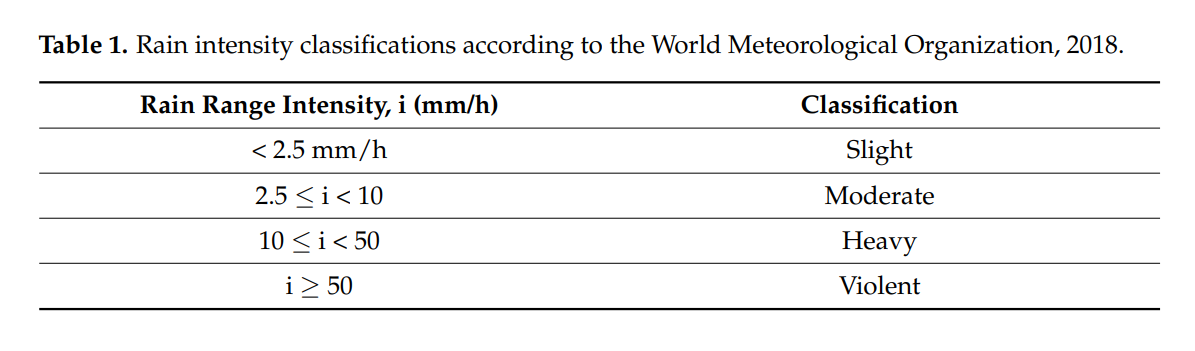

In [3]:
# จำแนกฝนตาม WMO 2018 https://www.researchgate.net/publication/353769617_Erosion_Rate_of_the_Aliano_Biancana_Badlands_Based_on_a_3D_Multi-Temporal_High-Resolution_Survey_and_Implications_for_Wind-Driven_Rain
df['rain_intensity'] = 'Slight'
df['rain_intensity'][df['rain_x'] <= 2.5] = 'Slight'
df['rain_intensity'][(df['rain_x'] > 2.5) & (df['rain_x'] <= 10.0)] = 'Moderate'
df['rain_intensity'][(df['rain_x'] > 10.0) & (df['rain_x'] <= 50.0)] = 'Heavy'
df['rain_intensity'][df['rain_x'] > 50.0] = 'Violent'
df

,cappi1km,cappi2km,cappi3km,cappi4km,full_date,code,rain_x,rain_intensity
6,18.245508,17.964867,17.979790,18.295288,2018-06-01-00:00,CTKN,10.8,Heavy
72,25.722824,25.153559,25.436876,25.657282,2018-06-01-01:00,CMSG,0.4,Slight
107,44.015987,40.230587,39.639973,38.263885,2018-06-01-01:00,PIN004,0.2,Slight
138,27.682062,26.767149,25.615660,24.295784,2018-06-01-02:00,CMSG,0.2,Slight
158,26.207233,26.207233,26.207233,26.207232,2018-06-01-02:00,NAN013,0.2,Slight
...,...,...,...,...,...,...,...,...
57347,25.825758,26.728218,27.518534,28.241079,2018-09-20-17:00,TGSK,0.2,Slight
58809,42.183460,42.041981,41.005638,38.473560,2018-09-21-14:00,PIN003,2.4,Slight
58997,28.382376,28.203165,27.679672,26.672712,2018-09-21-17:00,CNDN,0.2,Slight
59178,25.915712,25.959574,25.933939,25.477449,2018-09-21-19:00,NAN013,24.8,Heavy


## save dataframe ออกไปเป็น csv เพื่อนำไปสร้าง Model ML ANN

In [4]:
df.rename(columns={"cappi1km": "dBZ_c1", "cappi2km": "dBZ_c2","cappi3km": "dBZ_c3","cappi4km": "dBZ_c4"}, inplace=True)
df['rain_truth']=df['rain_x'] #เพิ่มคอลัมน์ target ด้านหลังสุด
df.drop(columns=['rain_x','full_date','code'], inplace=True) #ลบคอลัน์

In [5]:
## save dataframe ออกไปเป็น csv เพื่อนำไปสร้าง Model ML ANN
df.to_csv('./00Results/df_org_dbz_rain_test120km_full_features.csv')

In [6]:
#df.dropna(inplace=True)

## ทดสอบ ZRs เพื่อหาค่า corr กับ ฝนสสน.

https://wx.erau.edu/faculty/mullerb/Wx365/Radar_equation/radar_equation.pdf

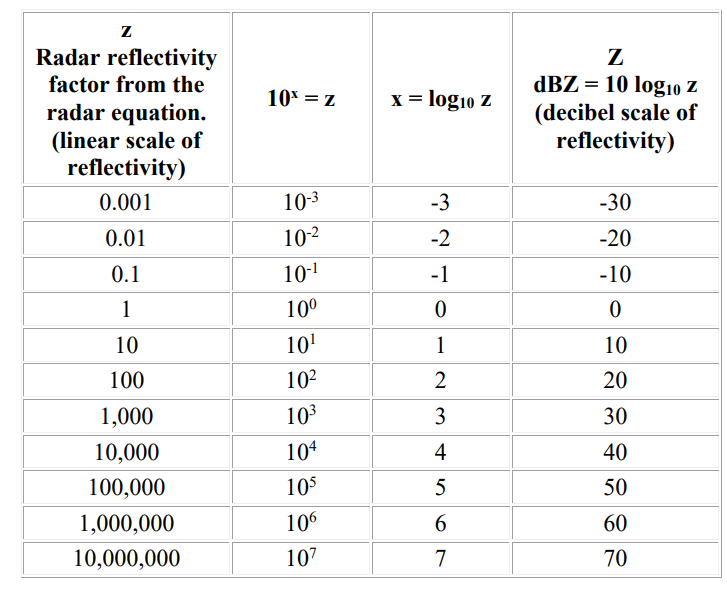

https://severeweather.wmo.int/TCFW/RAIV_Workshop2017/11_Radar_StaceySteward.pdf
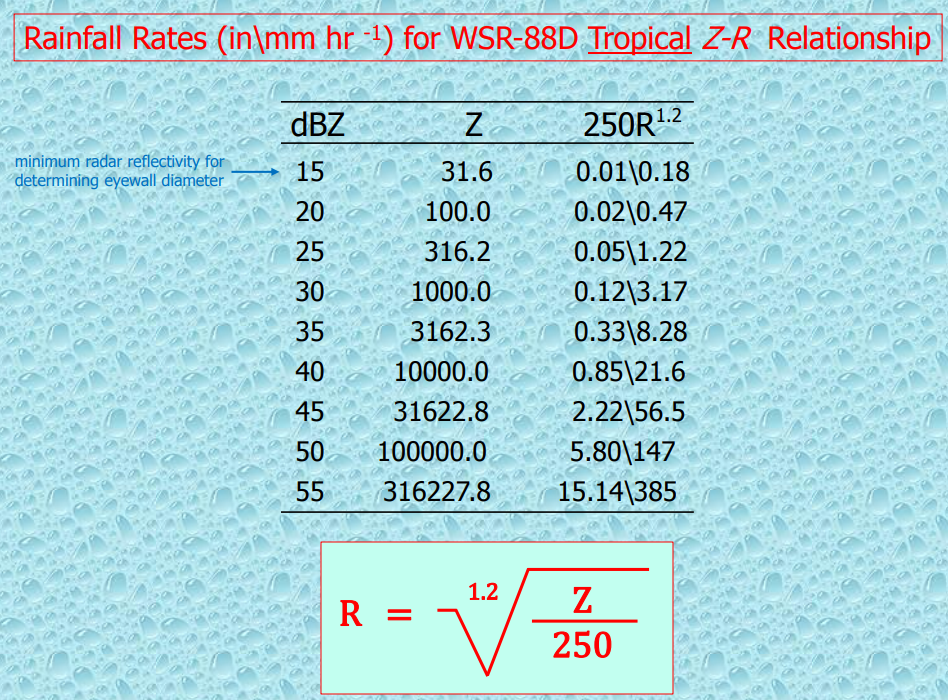

## ทดสอบการคำนวณ ZR

In [7]:
#แปลง dBZ > Z  # Z=a*R^b
#https://docs.wradlib.org/en/stable/notebooks/basics/wradlib_get_rainfall.html
#https://docs.wradlib.org/en/stable/generated/wradlib.zr.z_to_r.html
#https://docs.wradlib.org/en/stable/_modules/wradlib/zr.html#z_to_r
import math
a=200
b=1.6
dBZ = np.array([20.0, 30.0, 40.0, 45.0, 50.0, 55.0])
Z = 10**(dBZ/10.)
R = (Z/a)**(1/b)  # 
print('dBZ: ', dBZ)
print('R: ', np.round(R,2), 'mm/hr')

dBZ:  [20. 30. 40. 45. 50. 55.]
R:  [ 0.65  2.73 11.53 23.68 48.62 99.85] mm/hr


## คำนวณ ZRs สามแบบกับ cappis/ppis
เป็นการเพิ่ม features ก่อนนำไปสร้าง model ML

### ZR marshall/palmer

In [8]:
### ZR marshall/palmer
a=200. 
b=1.6
df['rr_MP_c1']=((10**(df['dBZ_c1']/10.))/a)**(1/b)
df['rr_MP_c2']=((10**(df['dBZ_c2']/10.))/a)**(1/b)
df['rr_MP_c3']=((10**(df['dBZ_c3']/10.))/a)**(1/b)
df['rr_MP_c4']=((10**(df['dBZ_c4']/10.))/a)**(1/b)


### ZR Rosenfeld

In [9]:
### ZR Rosenfeld
a=250. 
b=1.2
df['rr_RF_c1']=((10**(df['dBZ_c1']/10.))/a)**(1/b)
df['rr_RF_c2']=((10**(df['dBZ_c2']/10.))/a)**(1/b)
df['rr_RF_c3']=((10**(df['dBZ_c3']/10.))/a)**(1/b)
df['rr_RF_c4']=((10**(df['dBZ_c4']/10.))/a)**(1/b)
#df

### ZR Summer Deep Convection

In [10]:
### ZR Summer Deep Convection
a=300. 
b=1.4
df['rr_SC_c1']=((10**(df['dBZ_c1']/10.))/a)**(1/b)
df['rr_SC_c2']=((10**(df['dBZ_c2']/10.))/a)**(1/b)
df['rr_SC_c3']=((10**(df['dBZ_c3']/10.))/a)**(1/b)
df['rr_SC_c4']=((10**(df['dBZ_c4']/10.))/a)**(1/b)
#df

# จัดตารางใหม่ ตั้งชื่อให้สอดคล้อง ก่อนนำไปวิเคราะห์

In [11]:
#df['rain_truth']=df['rain_x'] #เพิ่มคอลัมน์ target ด้านหลังสุด
#df.drop(columns=['rain_x','full_date','code'], inplace=True) #ลบคอลัน์
#df.rename(columns={"cappi1km": "dBZ_c1", "cappi2km": "dBZ_c2","cappi3km": "dBZ_c3","cappi4km": "dBZ_c4"}, inplace=True)
df

,dBZ_c1,dBZ_c2,dBZ_c3,dBZ_c4,rain_intensity,rain_truth,rr_MP_c1,rr_MP_c2,rr_MP_c3,rr_MP_c4,rr_RF_c1,rr_RF_c2,rr_RF_c3,rr_RF_c4,rr_SC_c1,rr_SC_c2,rr_SC_c3,rr_SC_c4
6,18.245508,17.964867,17.979790,18.295288,Heavy,10.8,0.503733,0.483794,0.484834,0.507355,0.332794,0.315347,0.316251,0.335988,0.341884,0.326462,0.327264,0.344694
72,25.722824,25.153559,25.436876,25.657282,Slight,0.4,1.477518,1.361299,1.417950,1.463647,1.397286,1.252698,1.322685,1.379823,1.169425,1.064904,1.115700,1.156886
107,44.015987,40.230587,39.639973,38.263885,Slight,0.2,20.552065,11.919772,10.948498,8.981505,46.742895,22.608179,20.185881,15.501502,23.693367,12.712795,11.535975,9.199460
138,27.682062,26.767149,25.615660,24.295784,Slight,0.2,1.958778,1.717130,1.454906,1.203214,2.034957,1.707310,1.368847,1.062589,1.614053,1.388567,1.148994,0.924785
158,26.207233,26.207233,26.207233,26.207232,Slight,0.2,1.584194,1.584194,1.584194,1.584193,1.533391,1.533391,1.533391,1.533390,1.266406,1.266406,1.266406,1.266405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57347,25.825758,26.728218,27.518534,28.241079,Slight,0.2,1.499568,1.707536,1.913219,2.122872,1.425158,1.694604,1.972095,2.265374,1.189391,1.379705,1.571221,1.769488
58809,42.183460,42.041981,41.005638,38.473560,Slight,2.4,15.787833,15.469634,13.326271,9.256649,32.885543,32.004795,26.233315,16.137888,17.527984,17.124831,14.441152,9.522240
58997,28.382376,28.203165,27.679672,26.672712,Slight,0.2,2.166480,2.111320,1.958104,1.693951,2.327634,2.248953,2.034024,1.676651,1.811091,1.758488,1.613419,1.367167
59178,25.915712,25.959574,25.933939,25.477449,Heavy,24.8,1.519107,1.528726,1.523097,1.426254,1.449971,1.462226,1.455051,1.333022,1.207119,1.215858,1.210743,1.123170


## พลอต scatter diagrams ก่อน remove nan

In [12]:
#sns.set_theme(style="ticks")
#sns.pairplot(df, hue="rain_intensity")

## พลอต correlation matrix แบบ conditional rain ก่อน remove nan

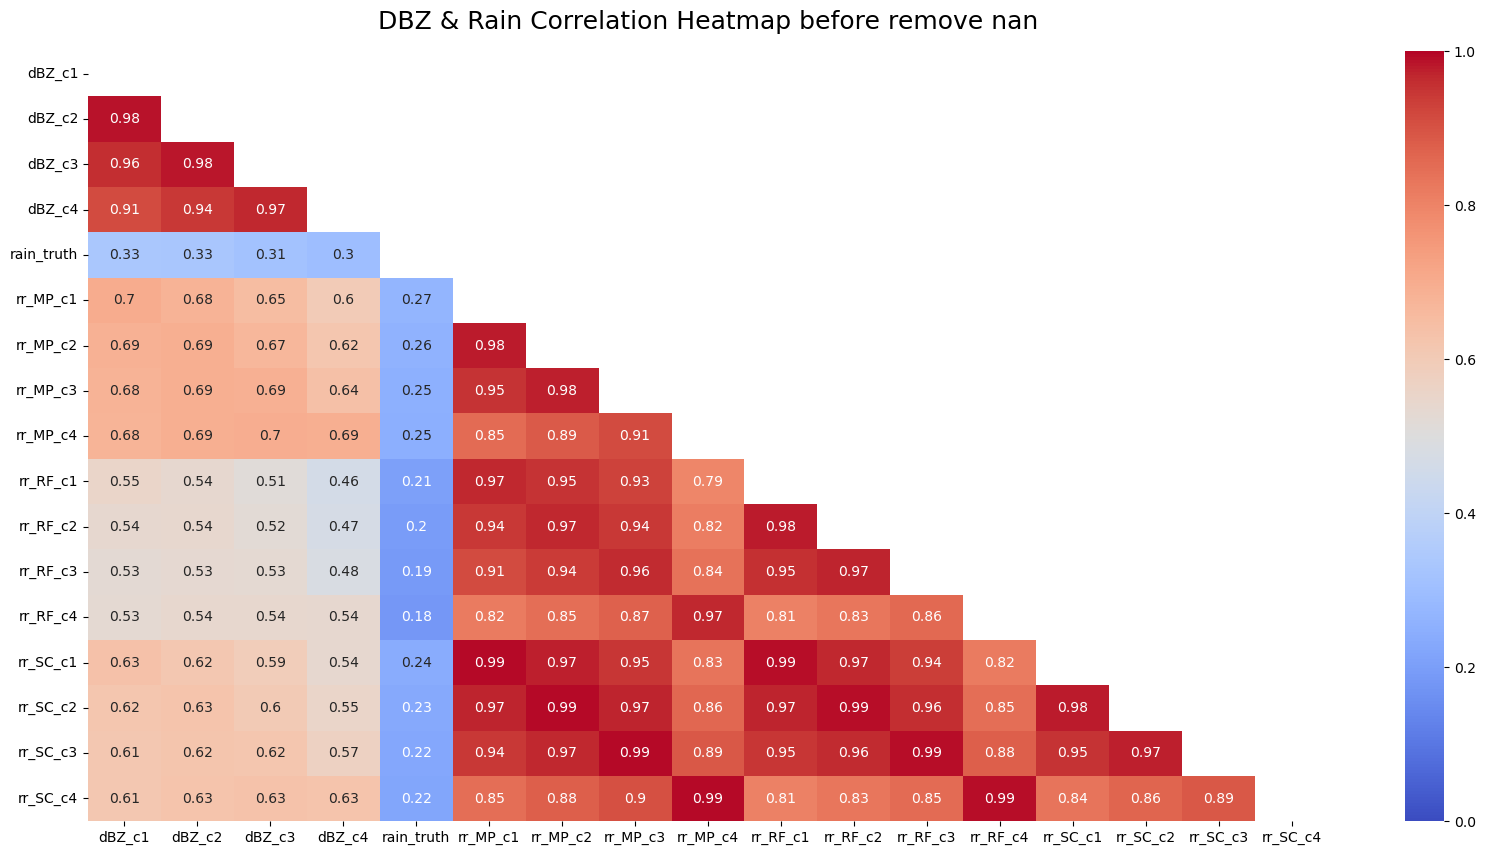

In [13]:
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('DBZ & Rain Correlation Heatmap before remove nan', fontdict={'fontsize':18}, pad=16);

### หลัง remove nan

In [14]:
#หลัง remove nan
df=df.dropna()
#df

In [15]:
#df.corr()

## พลอต scatter diagrams หลัง remove nan

In [16]:
#sns.set_theme(style="ticks")
#sns.pairplot(df, hue="rain_intensity")

## พลอต correlation matrix แบบ conditional rain หลัง remove nan

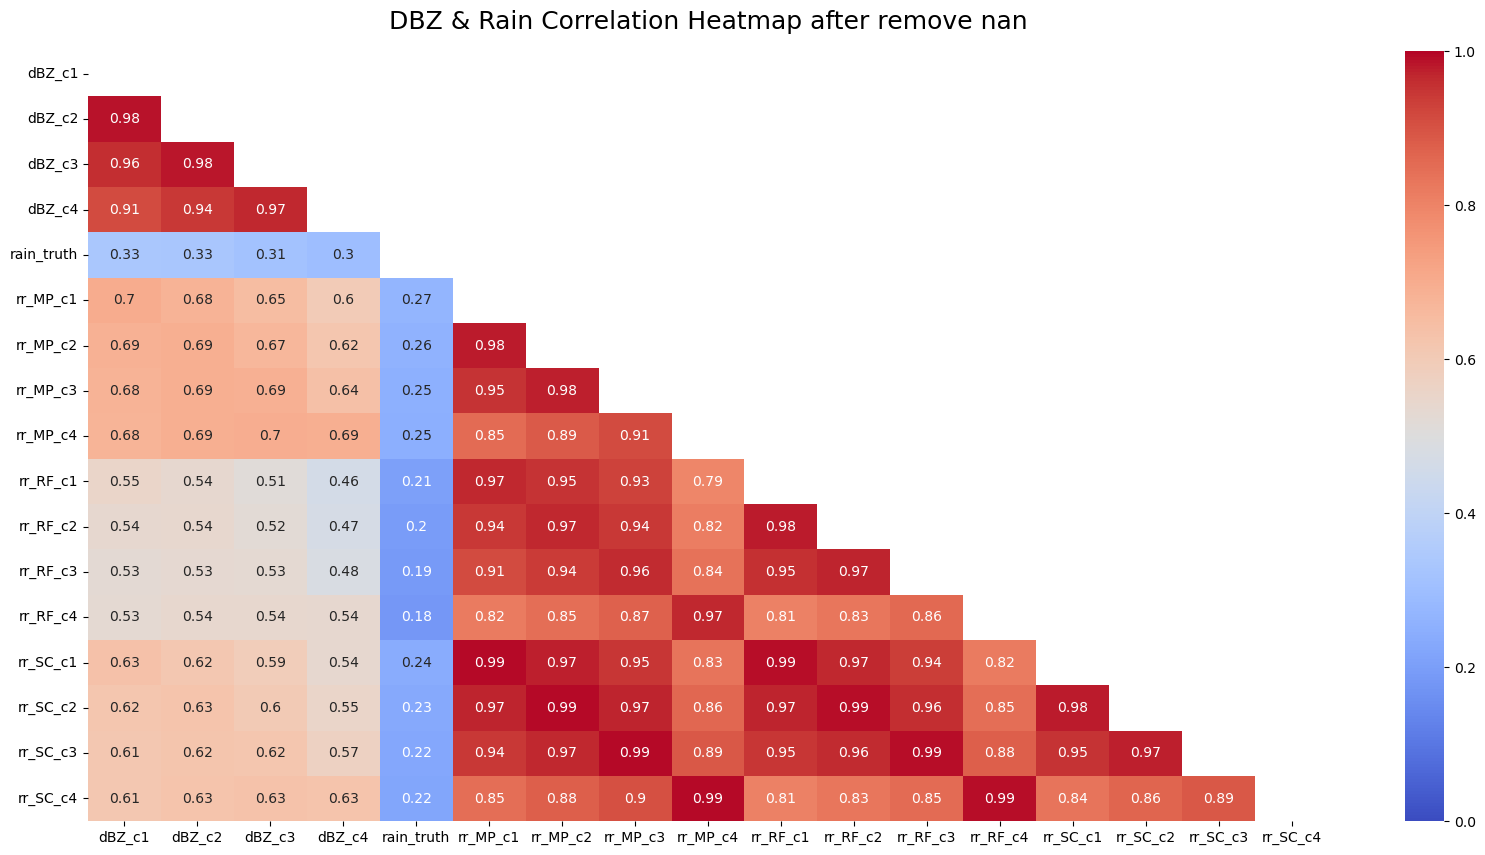

In [17]:
plt.figure(figsize=(20, 10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=0, vmax=1, annot=True, cmap='coolwarm')
heatmap.set_title('DBZ & Rain Correlation Heatmap after remove nan', fontdict={'fontsize':18}, pad=16);

## อธิบายผล correlation matrix
* ค่าสหสัมพันธ์ระหว่างฝนภาคพื้นดินกับตัวแปรเรดาร์ตรวจอากาศมีค่าในภาพรวมค่อนข้างต่ำ เนื่องจากเป็นข้อมูลฝนรายชั่วโมง มีการกวาดจำนวนสี่ครั้งต่อชั่วโมง 
* ค่าสหสัมพันธ์ระหว่างค่า dBZ กับฝนภาคพื้นดิน ไม่มีความแตกต่างมากนักกับค่าฝนประมาณค่าจากเรดาร์ที่ใช้ค่า reflectivity factor (Z) 
* ค่าสหสัมพันธ์ที่ดีจะอยู่ในมุมยกที่ 1 และ 2 

## พลอต boxplot

### boxplot cappi 1km

[Text(0.5, 0, 'Rain intensity WMO'), Text(0, 0.5, 'Cappi 1km (dBZ)')]

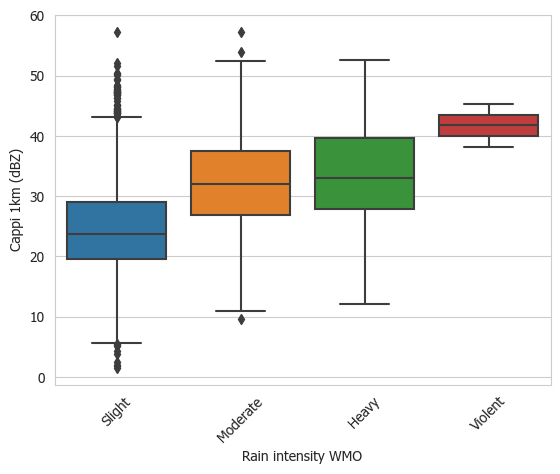

In [18]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
bbplot=sns.boxplot(x ='rain_intensity' , y = 'dBZ_c1', data = df, order=['Slight', 'Moderate', 'Heavy', 'Violent']) 
bbplot.set_xticklabels(bbplot.get_xticklabels(), rotation=45)
bbplot.set(xlabel='Rain intensity WMO',  ylabel='Cappi 1km (dBZ)')

### boxplot cappi 2km

[Text(0.5, 0, 'Rain intensity WMO'), Text(0, 0.5, 'Cappi 2km (dBZ)')]

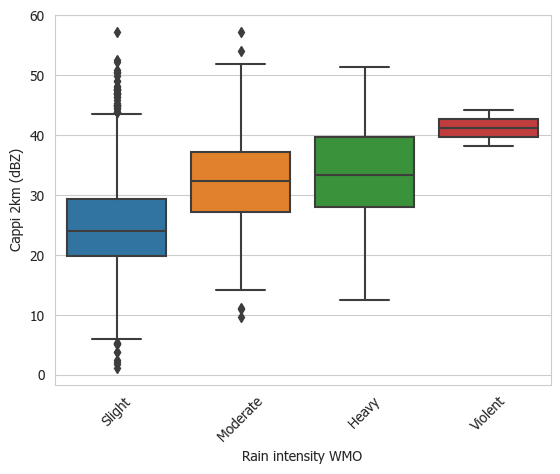

In [19]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
bbplot=sns.boxplot(x ='rain_intensity' , y = 'dBZ_c2', data = df, order=['Slight', 'Moderate', 'Heavy', 'Violent']) 
bbplot.set_xticklabels(bbplot.get_xticklabels(), rotation=45)
bbplot.set(xlabel='Rain intensity WMO',  ylabel='Cappi 2km (dBZ)')

[Text(0.5, 0, 'Rain intensity WMO'), Text(0, 0.5, 'Cappi 3km (dBZ)')]

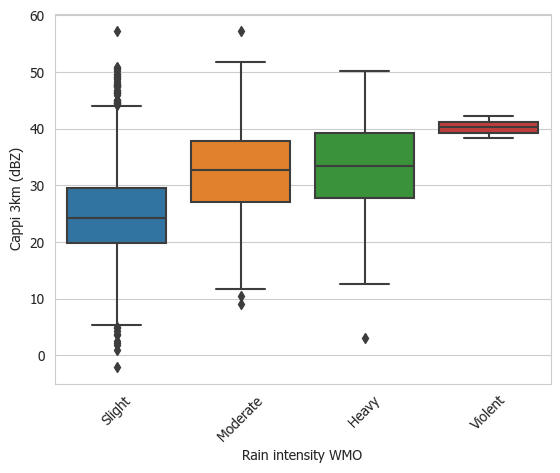

In [20]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
bbplot=sns.boxplot(x ='rain_intensity' , y = 'dBZ_c3', data = df, order=['Slight', 'Moderate', 'Heavy', 'Violent']) 
bbplot.set_xticklabels(bbplot.get_xticklabels(), rotation=45)
bbplot.set(xlabel='Rain intensity WMO',  ylabel='Cappi 3km (dBZ)')

[Text(0.5, 0, 'Rain intensity WMO'), Text(0, 0.5, 'Cappi 4km (dBZ)')]

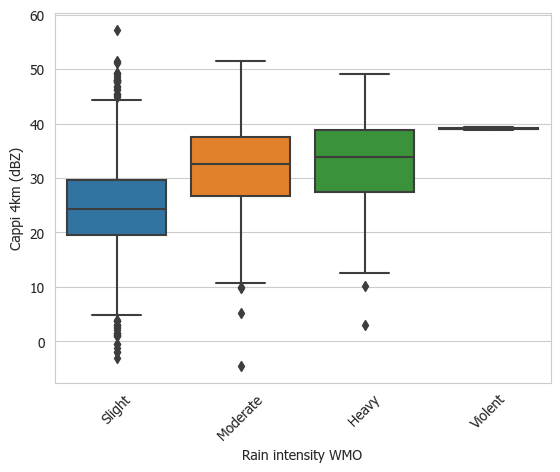

In [21]:
sns.set_style("whitegrid")   
sns.set_style({'font.family':'Tahoma'})
bbplot=sns.boxplot(x ='rain_intensity' , y = 'dBZ_c4', data = df, order=['Slight', 'Moderate', 'Heavy', 'Violent']) 
bbplot.set_xticklabels(bbplot.get_xticklabels(), rotation=45)
bbplot.set(xlabel='Rain intensity WMO',  ylabel='Cappi 4km (dBZ)')

In [22]:
df

,dBZ_c1,dBZ_c2,dBZ_c3,dBZ_c4,rain_intensity,rain_truth,rr_MP_c1,rr_MP_c2,rr_MP_c3,rr_MP_c4,rr_RF_c1,rr_RF_c2,rr_RF_c3,rr_RF_c4,rr_SC_c1,rr_SC_c2,rr_SC_c3,rr_SC_c4
6,18.245508,17.964867,17.979790,18.295288,Heavy,10.8,0.503733,0.483794,0.484834,0.507355,0.332794,0.315347,0.316251,0.335988,0.341884,0.326462,0.327264,0.344694
72,25.722824,25.153559,25.436876,25.657282,Slight,0.4,1.477518,1.361299,1.417950,1.463647,1.397286,1.252698,1.322685,1.379823,1.169425,1.064904,1.115700,1.156886
107,44.015987,40.230587,39.639973,38.263885,Slight,0.2,20.552065,11.919772,10.948498,8.981505,46.742895,22.608179,20.185881,15.501502,23.693367,12.712795,11.535975,9.199460
138,27.682062,26.767149,25.615660,24.295784,Slight,0.2,1.958778,1.717130,1.454906,1.203214,2.034957,1.707310,1.368847,1.062589,1.614053,1.388567,1.148994,0.924785
158,26.207233,26.207233,26.207233,26.207232,Slight,0.2,1.584194,1.584194,1.584194,1.584193,1.533391,1.533391,1.533391,1.533390,1.266406,1.266406,1.266406,1.266405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57347,25.825758,26.728218,27.518534,28.241079,Slight,0.2,1.499568,1.707536,1.913219,2.122872,1.425158,1.694604,1.972095,2.265374,1.189391,1.379705,1.571221,1.769488
58809,42.183460,42.041981,41.005638,38.473560,Slight,2.4,15.787833,15.469634,13.326271,9.256649,32.885543,32.004795,26.233315,16.137888,17.527984,17.124831,14.441152,9.522240
58997,28.382376,28.203165,27.679672,26.672712,Slight,0.2,2.166480,2.111320,1.958104,1.693951,2.327634,2.248953,2.034024,1.676651,1.811091,1.758488,1.613419,1.367167
59178,25.915712,25.959574,25.933939,25.477449,Heavy,24.8,1.519107,1.528726,1.523097,1.426254,1.449971,1.462226,1.455051,1.333022,1.207119,1.215858,1.210743,1.123170


In [23]:
df['rain_intensity']

6         Heavy
72       Slight
107      Slight
138      Slight
158      Slight
          ...  
57347    Slight
58809    Slight
58997    Slight
59178     Heavy
59217     Heavy
Name: rain_intensity, Length: 3693, dtype: object